In [4]:
import numpy as np
import pandas as pd

**3.1** **- Problem 1: Getting Started with Data Exploration**

1. Data Exploration and Understanding:

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Assigment1/WHR-2024-5CS037.csv")
data .head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
# Identify number of rows and columns
data.shape

(143, 9)

In [ ]:
# List all the columns and their data types
print("Columns and their data types: \n")
data.info()

Columns and their data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


In [ ]:
# Calculate the mean, median, and standard deviation for the Score column.

score_mean = data['score'].mean()
print("Mean: ", score_mean)

score_median = data['score'].median()
print("Median: ", score_median)

score_sd = data['score'].std()
print("Standard Deviation: ", score_sd)


Mean:  5.52758041958042
Median:  5.785
Standard Deviation:  1.1707165099442995


In [ ]:
# Identify the country with the highest and lowest happiness scores.

max_score = data['score'].max()
print("Highest happiness score: ", max_score)

min_score = data['score'].min()
print("Lowest happiness score: ", min_score)


Highest happiness score:  7.741
Lowest happiness score:  1.721


In [ ]:
# Check if there are any missing values in the dataset. If so, display the total count for each column.

missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
# Filter the dataset to show only the countries with a Score greater than 7.5.

filtered_by_score = data.loc[data['score'] > 7.5, ['Country name']]

print("Filtered Dataset - Contries with score higher than 7.5:\n")
filtered_by_score

Filtered Dataset - Contries with score higher than 7.5:



,Country name
0,Finland
1,Denmark
2,Iceland


In [ ]:
# For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

filtered_by_GDP = data.sort_values(by = ['Log GDP per capita'], ascending = False)
print("Sorting dataset by GDP in descending order: \n")
filtered_by_GDP.head(10)

Sorting dataset by GDP in descending order: 



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
16,Ireland,6.838,2.129,1.390,0.700,0.758,0.205,0.418,1.239
29,Singapore,6.523,2.118,1.361,0.769,0.743,0.168,0.575,0.788
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
22,United States,6.725,1.939,1.392,0.542,0.586,0.223,0.169,1.873
85,Hong Kong S.A.R. of China,5.316,1.909,1.184,0.857,0.485,0.147,0.402,0.333
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906


In [ ]:
# Create a new column called Happiness Category that categorizes countries into three categories based on their Score:

def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif (4 <= score <= 6):
      return 'Medium'
    else:
        return 'High'

data['Happiness_Category'] = data['score'].apply(categorize_happiness)

data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,High
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,High
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,High


2. Data Visualizations

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

<Figure size 1600x600 with 0 Axes>

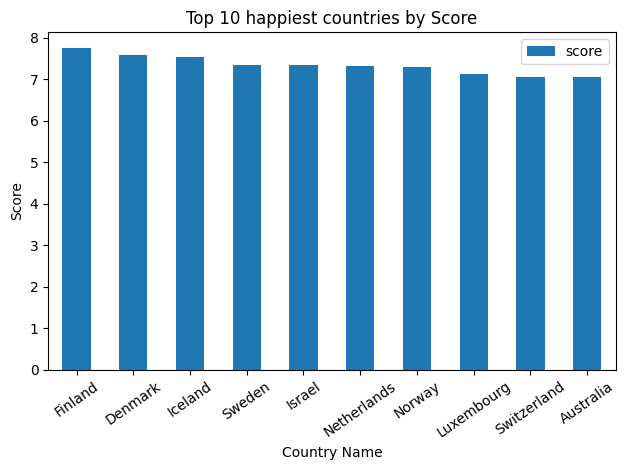

In [ ]:
# Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
import matplotlib.pyplot as plt
import pandas as pd

top_10_countries = data.sort_values(by = 'score', ascending = False).head(10)
plt.figure(figsize=(16,6))
bar_plot = top_10_countries.plot.bar(x = 'Country name', y = 'score', legend = True)
bar_plot.set_xlabel('Country Name')
bar_plot.set_ylabel('Score')
bar_plot.set_title('Top 10 happiest countries by Score')

plt.xticks(rotation = 35)
plt.tight_layout()
plt.show()

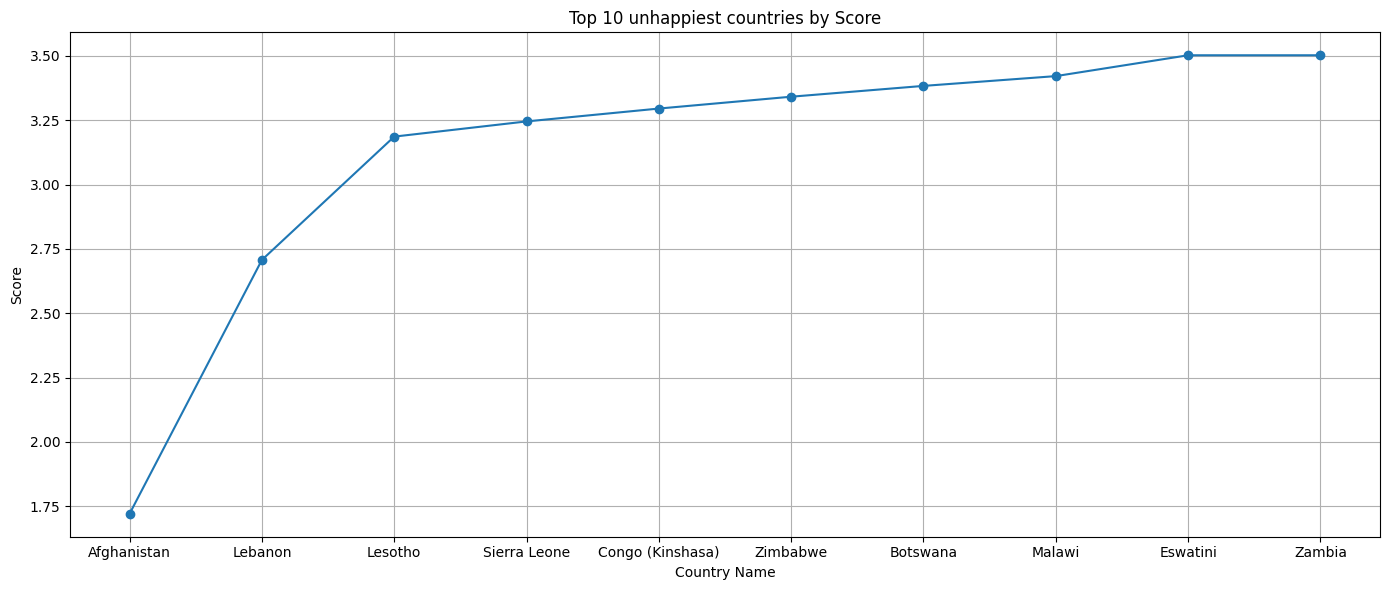

In [ ]:
# Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
import matplotlib.pyplot as plt
import pandas as pd

top_10_unhappiest = data.sort_values(by = 'score', ascending = True).head(10)

plt.figure(figsize = (14,6))

line_plot = plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker = 'o')
plt.xlabel('Country Name')
plt.ylabel('Score')
plt.title('Top 10 unhappiest countries by Score')
plt.grid()
plt.tight_layout()
plt.show()

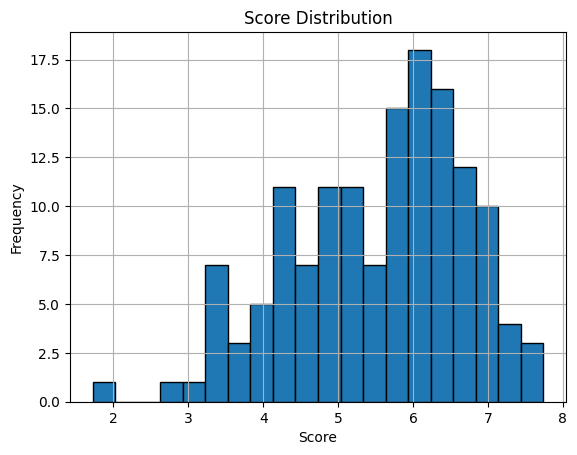

In [ ]:
# Plot a histogram for the Score column to show its distribution and also interpret.
import matplotlib.pyplot as plt
import pandas as pd

data['score'].hist(bins = 20, edgecolor = 'black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Score Distribution')
plt.show()

Interpretation:

In the above histogram, the x-axis (score) represents the range of scores divided into 20 bins. The y-axis (frequency) represents the number of observations.
Here, the tallest bar is between 60-70, which means most scores lie in the range.
The left side of the histogram has a long tail, which means a negative skew. Few of the scores are unusually lower than the rest.
The variability of long and short bars represents that the scores are not uniformly distributed. There is a single bar placed with a significant gap which possibly may be an outlier.


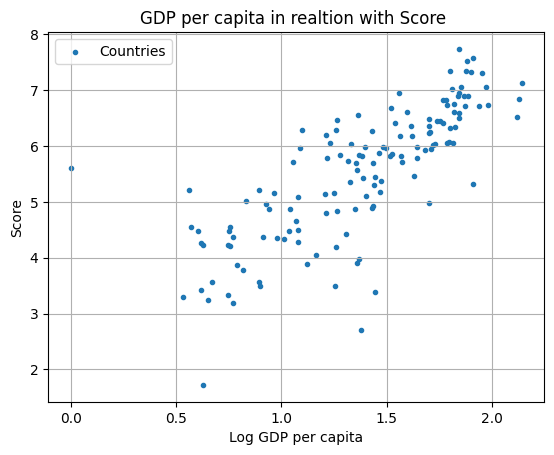

In [ ]:
# Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
import matplotlib.pyplot as plt
import pandas as pd

filtered_data = data[['Log GDP per capita', 'score']]

plt.scatter(x = filtered_data['Log GDP per capita'], y = filtered_data['score'], marker = '.', label = 'Countries')

plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('GDP per capita in realtion with Score ')
plt.legend()
plt.grid(True)
plt.show()


**3.2 - Problem 2 : Some Advance Data Exploration Task**







Task 1 - Setup Task

In [ ]:
# Define the countries in South Asia with a list for example:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

# Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
filtered_data_asian_countries = data[data['Country name'].isin(south_asian_countries)]

# Save the filtered dataframe as separate CSV files.
output_file = "filtered_data_asian_countries.csv"
filtered_data_asian_countries.to_csv(output_file, index = False)
print(f"Filtered data saved to {output_file}")

Filtered data saved to filtered_data_asian_countries.csv


In [ ]:
# The seperate CSV file named as filtered_data_asian_countries
filtered_data_asian_countries.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672


Task 2 - Composite Score Ranking

In [1]:
# 1.Using the SouthAsia DataFrame, create a new column called Composite Score that combines the given metrics:
# Composite Score = 0.40 * GDP + 0.30 * Social support = 0.30 * Healthy Life Expectancy

southasian_data = pd.read_csv("/content/filtered_data_asian_countries.csv")

southasian_data['Composite Score'] = (southasian_data['Log GDP per capita'] * 0.40 + southasian_data['Social support'] * 0.30 + southasian_data['Healthy life expectancy'] * 0.30)

southasian_data.head()

NameError: name 'pd' is not defined

In [ ]:
southasian_data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


In [ ]:
# 2.Rank the South Asian countries based on the Composite Score in descending order.

ranked_southasian_data = southasian_data.sort_values(by = 'Composite Score', ascending = False)

print("Ranked South Asian countries based on Composite Score in descending order\n")
ranked_southasian_data

Ranked South Asian countries based on Composite Score in descending order



,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238


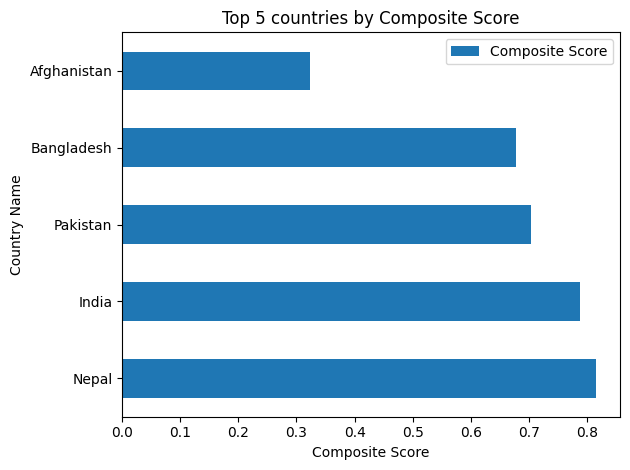

In [ ]:
# 3.Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
import matplotlib.pyplot as plt

top_5_countries = southasian_data.sort_values(by = 'Composite Score', ascending = False).head(5)
bar_plot = top_5_countries.plot.barh(x = 'Country name', y = 'Composite Score', legend = True)
bar_plot.set_xlabel('Composite Score')
bar_plot.set_ylabel('Country Name')
bar_plot.set_title('Top 5 countries by Composite Score')

plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()


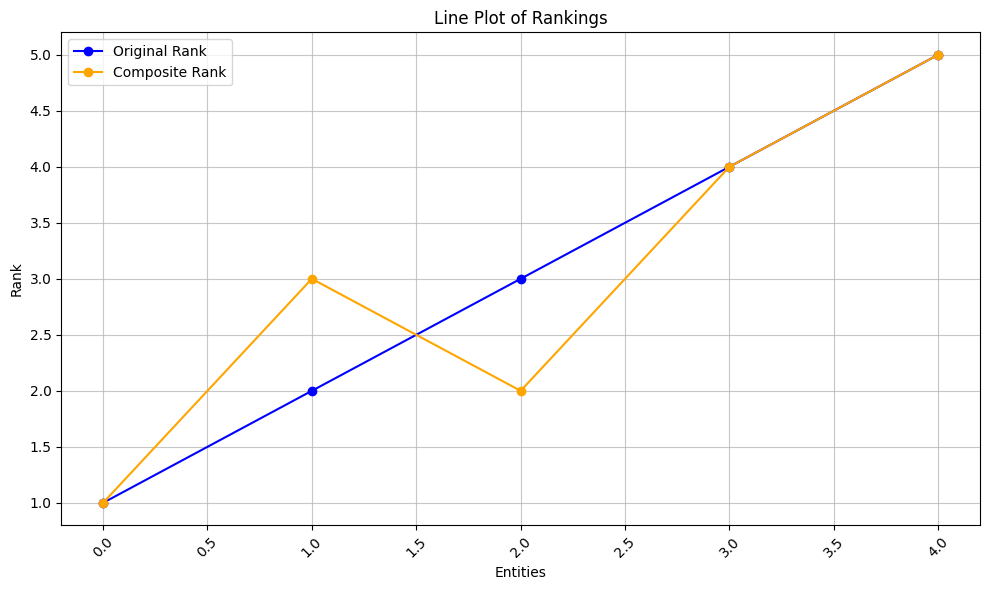

In [ ]:
# 4.Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Rank the scores
southasian_data['Original_Rank'] = southasian_data['score'].rank(ascending=False)
southasian_data['Composite_Rank'] = southasian_data['Composite Score'].rank(ascending=False)

# Line Plot for Ranks
plt.figure(figsize=(10, 6))
plt.plot(southasian_data['Original_Rank'], marker='o', label='Original Rank', color='blue')
plt.plot(southasian_data['Composite_Rank'], marker='o', label='Composite Rank', color='orange')

# Add labels and title
plt.title('Line Plot of Rankings')
plt.xlabel('Entities')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.7)

plt.tight_layout()
plt.show()


Task 3 - Outlier Detection

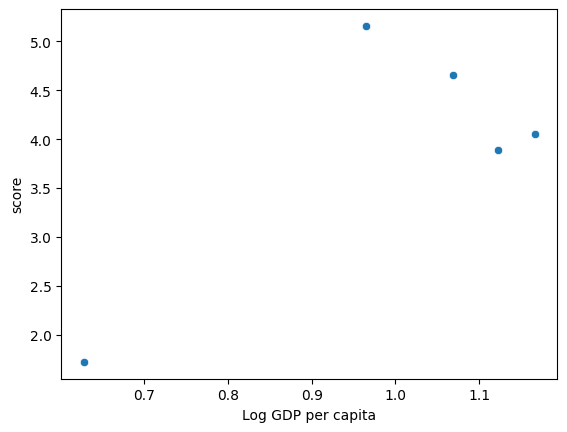

In [ ]:
# 1.Identify outlier countries in South Asia based on their Score and GDP per Capita.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.scatterplot(data = southasian_data, x = 'Log GDP per capita', y = 'score')
plt.show()

In [ ]:
southasian_data.describe()

,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,Original_Rank,Composite_Rank
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.895200,0.990000,0.498400,0.387200,0.547400,0.151600,0.113200,1.207400,0.661680,3.000000,3.000000
std,1.316003,0.215818,0.382916,0.106411,0.320489,0.043764,0.035871,0.590412,0.197346,1.581139,1.581139
min,1.721000,0.628000,0.000000,0.242000,0.000000,0.091000,0.074000,0.672000,0.323800,1.000000,1.000000
25%,3.886000,0.965000,0.249000,0.321000,0.542000,0.140000,0.088000,0.756000,0.677400,2.000000,2.000000
50%,4.054000,1.069000,0.600000,0.417000,0.653000,0.144000,0.115000,0.919000,0.703900,3.000000,3.000000
75%,4.657000,1.122000,0.653000,0.443000,0.767000,0.174000,0.122000,1.783000,0.787400,4.000000,4.000000
max,5.158000,1.166000,0.990000,0.513000,0.775000,0.209000,0.167000,1.907000,0.815900,5.000000,5.000000


In [ ]:
# 2.Define outliers using the 1.5 × IQR rule.

outlier_score = 1.5 * (4.506250 - 3.889000) #Q3 - Q1
outlier_capita = 1.5 * (1.155000 - 0.991000) #Q3 - Q1
print("Outlier in score: ",outlier_score)
print("Outlier in GDP per capita: ",outlier_capita)

Outlier in score:  0.9258749999999998
Outlier in GDP per capita:  0.24600000000000005


Scatter plot : GDP per Capita on the x-axis and Score on the y-axis


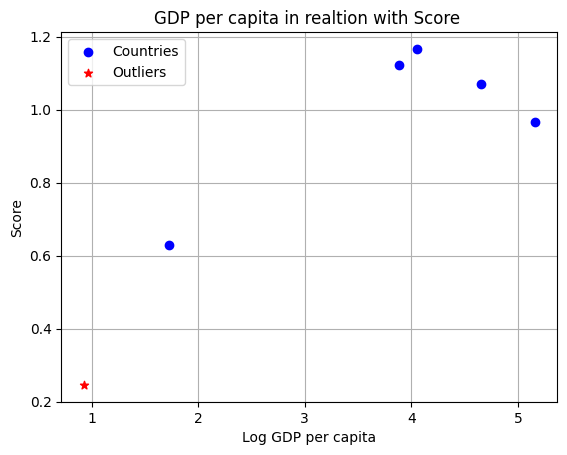

In [ ]:
# 3.Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
import matplotlib.pyplot as plt
import pandas as pd

# Scatter plot for all countries
plt.scatter(x = southasian_data["score"], y = southasian_data["Log GDP per capita"], color="blue", label="Countries")

# Highlight outliers in red
plt.scatter(x = outlier_score, y = outlier_capita, color="red", marker="*", label="Outliers")

print("Scatter plot : GDP per Capita on the x-axis and Score on the y-axis")

#plt.scatter(x = filtered_data['Log GDP per capita'], y = filtered_data['score'], marker = '.', label = 'Countries')

plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('GDP per capita in realtion with Score ')
plt.legend()
plt.grid(True)
plt.show()


Task 4 - Exploring Trends Across Metrices


In [ ]:
# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.

# Selecting two columns : Social support and Generosity
freedom_gener_col = southasian_data[['Social support','Generosity']]

# Selecting column : Score
score_col = southasian_data['score']

# Correlation  between Score and other two columns
correlations = freedom_gener_col.apply(lambda col: col.corr(score_col, method='pearson'))

print("Correlation between Score and other two columns:")
print(correlations)

Correlation between Score and other two columns:
Social support    0.897298
Generosity        0.877333
dtype: float64


           Metric  Correlation
0  Social support     0.897298
1      Generosity     0.877333



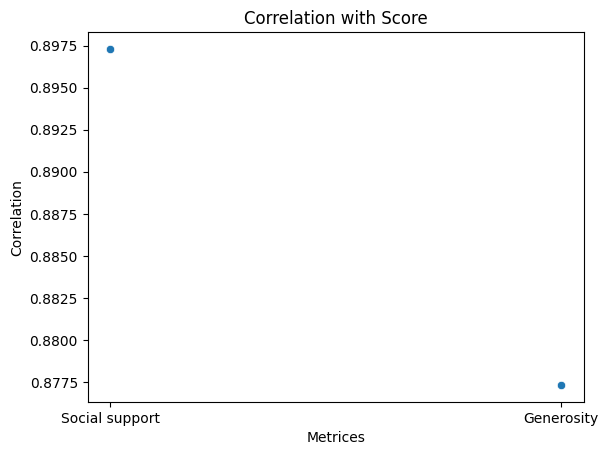

In [ ]:
# 2. Create scatter plots with trendlines for these metrics against the Score.

freedom_gener_col = southasian_data[['Social support','Generosity']]
score_col = southasian_data['score']

# Calculates correlation between the columns
correlations = freedom_gener_col.apply(lambda col: col.corr(score_col))

# Converts the correlations into a DataFrame with index
cor_df = correlations.reset_index()
# Renames columns of DataFrame
cor_df.columns = ['Metric', 'Correlation']
print(cor_df)

print()

sns.scatterplot(data = cor_df, x = 'Metric', y = 'Correlation')
plt.title('Correlation with Score')
plt.xlabel('Metrices')
plt.ylabel('Correlation')
plt.show()

3. Identify the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

-> Strongest relationship : 'Social support' has the strongest relationship with the 'score' column because of its correlation value which is 0.897298; higher than that of 'Generosity'.

-> Weakest relationship : 'Generosity' has the weakest relationship with the score since, its correlation value 0.877333; which is lower than that of 'Social support'.

Task 5 - Gap Analysis

In [ ]:
# 1.Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.

southasian_data['GDP-Score Gap'] = southasian_data['score'] - southasian_data['Log GDP per capita']
southasian_data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,Original_Rank,Composite_Rank,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,1.0,1.0,4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,2.0,3.0,3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,3.0,2.0,2.888
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,4.0,4.0,2.764
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,5.0,5.0,1.093


In [ ]:
# 2.Ranking the South Asian countries by this gap in descending order

southasian_data = southasian_data.sort_values(by = 'GDP-Score Gap', ascending = False)
print("Ranking south asian countries in descending order")
southasian_data.head()

Ranking south asian countries in descending order


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,Original_Rank,Composite_Rank,GDP-Score Gap
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,1.0,1.0,4.193
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,2.0,3.0,3.588
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,3.0,2.0,2.888
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,4.0,4.0,2.764
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,5.0,5.0,1.093


In [ ]:
# 2. In Ascending order

southasian_data = southasian_data.sort_values(by = 'GDP-Score Gap', ascending = True)
print("Ranking south asian countries in Ascending order")
southasian_data.head()

Ranking south asian countries in Ascending order


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,Original_Rank,Composite_Rank,GDP-Score Gap
4,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,0.3238,5.0,5.0,1.093
3,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,0.6774,4.0,4.0,2.764
2,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874,3.0,2.0,2.888
1,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039,2.0,3.0,3.588
0,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159,1.0,1.0,4.193


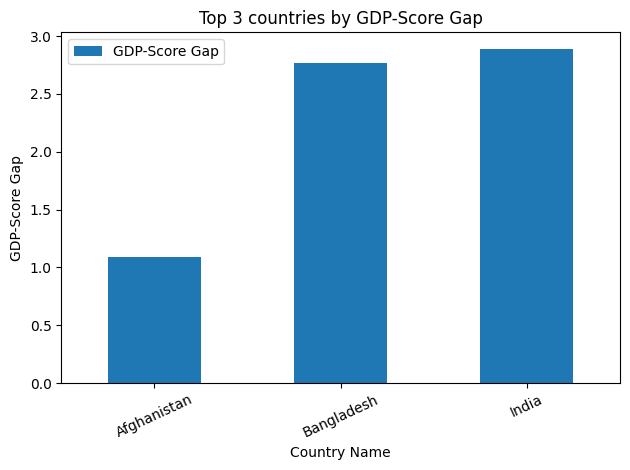

In [ ]:
# 3. Top 3 countries with the largest positive gaps using a bar chart

import matplotlib.pyplot as plt

top_3_countries = southasian_data.sort_values(by = 'GDP-Score Gap', ascending = True).head(3)
bar_plot = top_3_countries.plot.bar(x = 'Country name', y = 'GDP-Score Gap', legend = True)
bar_plot.set_xlabel('Country Name')
bar_plot.set_ylabel('GDP-Score Gap')
bar_plot.set_title('Top 3 countries by GDP-Score Gap')

plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

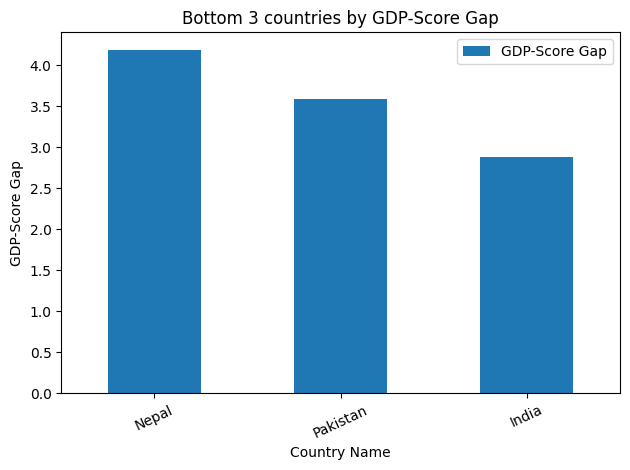

In [ ]:
# Top 3 countries with negative gaps using a bar chart

import matplotlib.pyplot as plt

bottom_3_countries = southasian_data.sort_values(by = 'GDP-Score Gap', ascending = False).head(3)
bar_plot = bottom_3_countries.plot.bar(x = 'Country name', y = 'GDP-Score Gap', legend = True)

bar_plot.set_xlabel('Country Name')
bar_plot.set_ylabel('GDP-Score Gap')
bar_plot.set_title('Bottom 3 countries by GDP-Score Gap')

plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.
-> The countries with positive gaps are ‘Afghanistan’, ‘Bangladesh’ and ‘India’, which means these countries experience higher happiness levels in accordance with their GDP.

-> On the other hand, the countries with negative gaps such as ‘Nepal’, ‘Pakistan’ and ‘India’, tend to struggle with lower happiness score due to various issues beyond their individual wealth


3.3 - Problem 3 : Comparative Analysis


Task 1 - Preparing the Middle Eastern Dataset

In [ ]:
# 1.

# Define the countries in Middle East with a list
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter out matching dataset from list
filtered_data_middle_east_countries = data[data['Country name'].isin(middle_east_countries)]

# Save the filtered dataframe as seperate CSV files
output_file = "filtered_data_middle_east_countries.csv"
filtered_data_middle_east_countries.to_csv(output_file, index = False)
print(f"Filtered data saved to '{output_file}'")


Filtered data saved to 'filtered_data_middle_east_countries.csv'


Task 1.1 : Descriptive Statistics

In [ ]:
middle_east_data = pd.read_csv("/content/filtered_data_middle_east_countries.csv")
middle_east_data.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
1,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884
2,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741
3,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790
4,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1.1. Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

# Mean and Standard Deviation of South-Asian countries
print("Mean and SD: South Asian countries")
score_mean_south_asian = southasian_data['score'].mean()
print("Mean: ", score_mean_south_asian)

score_sd_south_asian = southasian_data['score'].std()
print("Standard Deviation: ", score_sd_south_asian)

print()

# Mean and Standard Deviation of Middle-East countries
print("Mean and SD: Middle East countries")
score_mean_middle_east = middle_east_data['score'].mean()
print("Mean: ", score_mean_middle_east)

score_sd_middle_east = middle_east_data['score'].std()
print("Standard Deviation: ", score_mean_middle_east)




Mean and SD: South Asian countries
Mean:  3.8952000000000004
Standard Deviation:  1.316002545590243

Mean and SD: Middle East countries
Mean:  5.412100000000001
Standard Deviation:  5.412100000000001


In [ ]:
# 1.2. Which region has higher happiness Scores on average?

# Compare the average happiness score using the calculated mean
if score_mean_south_asian > score_mean_middle_east:
  print("South Asia has a higher happiness score on average")
elif score_mean_south_asian < score_mean_middle_east:
  print("Middle East has a higher happiness score on average")
else:
  print("Both region have the same average happiness scores")

Middle East has a higher happiness score on average


Task 1.2 : Top and Bottom Performers

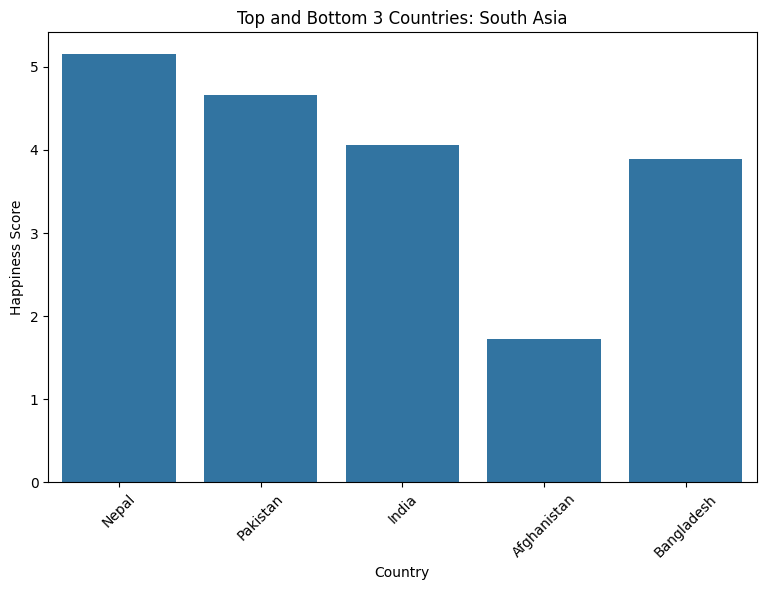

In [ ]:
# Top and Bottom 3 countries in South Asia based on the score

import matplotlib.pyplot as plt

top_3_southA_countries = southasian_data.sort_values(by = 'score', ascending = False).head(3)
bottom_3_southA_countries = southasian_data.sort_values(by = 'score', ascending = True).head(3)

south_asia_combined = pd.concat([top_3_southA_countries, bottom_3_southA_countries])

plt.figure(figsize = (15, 6))

# South Asia chart
plt.subplot(1,2,1)
sns.barplot(data = south_asia_combined, x = 'Country name', y = 'score')
plt.title('Top and Bottom 3 Countries: South Asia')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()



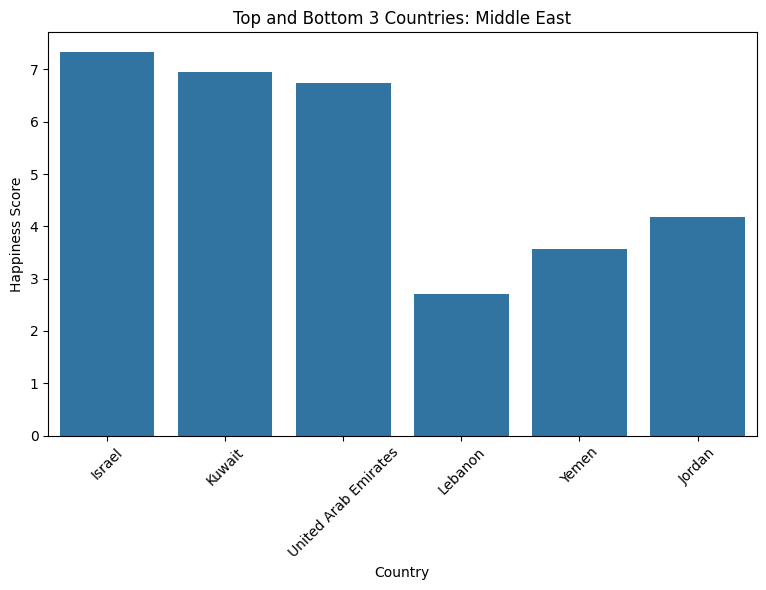

In [ ]:
# Top and bottom 3 countries in Middle East based on the score

import matplotlib.pyplot as plt

top_3_middleE_countries = middle_east_data.sort_values(by = 'score', ascending = False).head(3)
bottom_3_middleE_countries = middle_east_data.sort_values(by = 'score', ascending = True).head(3)

middle_east_combined = pd.concat([top_3_middleE_countries, bottom_3_middleE_countries])

plt.figure(figsize = (15, 6))

# Middle East chart
plt.subplot(1,2,1)
sns.barplot(data = middle_east_combined, x = 'Country name', y = 'score')
plt.title('Top and Bottom 3 Countries: Middle East')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

Task 1.3 : Metric Comparisons

<Figure size 1000x600 with 0 Axes>

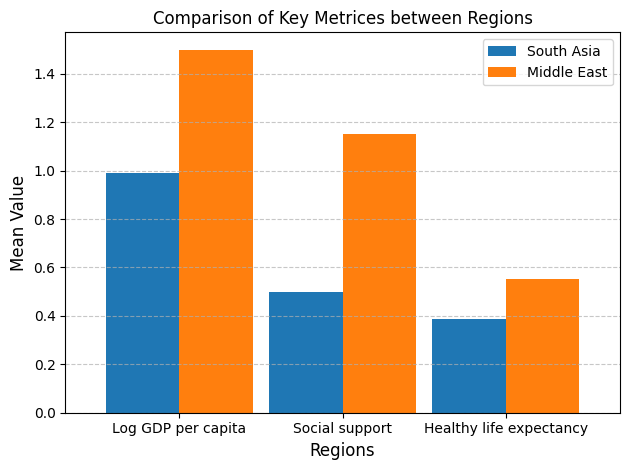

In [ ]:
# 1.1. Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

metrices = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asian_mean = southasian_data[metrices].mean()
middle_east_mean = middle_east_data[metrices].mean()

combined_df = pd.DataFrame({'South Asia': south_asian_mean, 'Middle East': middle_east_mean})

plt.figure(figsize = (10, 6))

combined_df.plot(kind = 'bar', width = 0.9, legend = True)
plt.title('Comparison of Key Metrices between Regions')
plt.xlabel('Regions', fontsize = 12)
plt.ylabel('Mean Value', fontsize = 12)
plt.xticks(rotation = 0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [ ]:
# 1.2. Which metrics shows the largest disparity between the two regions?

disparities = combined_df['South Asia'] - combined_df['Middle East']
absolute_disparities = disparities.abs()

print("Disparities between South Asia and Middle East")
print(absolute_disparities)
print()

max_disparity_metric = disparities.idxmax()
print("Metric showing the largest disparity between the two regions: ", max_disparity_metric)

max_disparity_value = disparities.max()
print("Disparity value: ", max_disparity_value)

Disparities between South Asia and Middle East
Log GDP per capita         0.506333
Social support             0.654378
Healthy life expectancy    0.166911
dtype: float64

Metric showing the largest disparity between the two regions:  Healthy life expectancy
Disparity value:  -0.16691111111111112


Task 1.4 : Happiness Disparity

In [ ]:
# 1.1. Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

max_score_south_asian = southasian_data['score'].max()
min_score_south_asian = southasian_data['score'].min()
# Range = max - min
range_score_south_asian = (max_score_south_asian - min_score_south_asian)

max_score_middle_east = middle_east_data['score'].max()
min_score_middle_east = middle_east_data['score'].min()
# Range = max - min
range_score_middle_east = (max_score_middle_east - min_score_middle_east)


# coefficient of variation(CV) = (SD / mean) * 100
cv_south_asian = (southasian_data['score'].std() / southasian_data['score'].mean()) * 100
cv_middle_east = (middle_east_data['score'].std() / middle_east_data['score'].mean()) * 100

print("Range of Score : South Asian Region: ", range_score_south_asian)
print("Coefficient of variation(CV): South Asian Region: ", cv_south_asian, "%")
print()
print("Range of Score : Middle East Region: ", range_score_middle_east)
print("Coefficient of variation(CV): Middle East Region: ", cv_middle_east, "%")


Range of Score : South Asian Region:  3.4370000000000003
Coefficient of variation(CV): South Asian Region:  33.785236845097636 %

Range of Score : Middle East Region:  4.634
Coefficient of variation(CV): Middle East Region:  28.938880812119404 %


In [ ]:
southasian_data.describe()

,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,Original_Rank,Composite_Rank,GDP-Score Gap
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.895200,0.990000,0.498400,0.387200,0.547400,0.151600,0.113200,1.207400,0.661680,3.000000,3.000000,2.905200
std,1.316003,0.215818,0.382916,0.106411,0.320489,0.043764,0.035871,0.590412,0.197346,1.581139,1.581139,1.165005
min,1.721000,0.628000,0.000000,0.242000,0.000000,0.091000,0.074000,0.672000,0.323800,1.000000,1.000000,1.093000
25%,3.886000,0.965000,0.249000,0.321000,0.542000,0.140000,0.088000,0.756000,0.677400,2.000000,2.000000,2.764000
50%,4.054000,1.069000,0.600000,0.417000,0.653000,0.144000,0.115000,0.919000,0.703900,3.000000,3.000000,2.888000
75%,4.657000,1.122000,0.653000,0.443000,0.767000,0.174000,0.122000,1.783000,0.787400,4.000000,4.000000,3.588000
max,5.158000,1.166000,0.990000,0.513000,0.775000,0.209000,0.167000,1.907000,0.815900,5.000000,5.000000,4.193000


In [ ]:
middle_east_data.describe()

,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,5.412100,1.496333,1.152778,0.554111,0.554333,0.139889,0.145889,1.307778
std,1.566201,0.416414,0.278277,0.123047,0.234531,0.064785,0.074122,0.782590
min,2.707000,0.671000,0.577000,0.293000,0.173000,0.059000,0.029000,-0.073000
25%,4.370250,1.262000,0.996000,0.511000,0.366000,0.080000,0.113000,0.760000
50%,5.562500,1.435000,1.164000,0.563000,0.593000,0.141000,0.172000,1.741000
75%,6.698250,1.842000,1.361000,0.594000,0.787000,0.200000,0.189000,1.809000
max,7.341000,1.983000,1.513000,0.740000,0.827000,0.235000,0.258000,2.298000


In [ ]:
# 1.2. Which region has greater variability in happiness?

south_asian_std = southasian_data['score'].std()
middle_east_std = middle_east_data['score'].std()

if south_asian_std > middle_east_std:
  greater_variability = 'South Asia'
  # print("South Asian region has greater variability in happiness")
else:
  greater_variability = 'Middle East'
  # print("Middle East region has greater variability in happiness")

print(f"Standard Deviation of Happiness Scores")
print(f"South Asia: {south_asian_std:.2f}")
print(f"Middle East: {middle_east_std:.2f}")
print(f"'{greater_variability}' has greater variability in happiness.")

Standard Deviation of Happiness Scores
South Asia: 1.32
Middle East: 1.57
'Middle East' has greater variability in happiness.


Task 1.5 : Correlation Analysis

In [ ]:
# 1.1. Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

# Selecting two columns : Freedom to make life choices and Generosity
south_asian_col = southasian_data[['Freedom to make life choices','Generosity']]

middle_east_col = middle_east_data[['Freedom to make life choices', 'Generosity']]

# Selecting column : Score
south_score_col = southasian_data['score']

middle_score_col = middle_east_data['score']

# Correlation between Score and other two columns
correlation_south = south_asian_col.apply(lambda col: col.corr(south_score_col))

correlation_middle = middle_east_col.apply(lambda col: col.corr(middle_score_col))

print("Correlation of Score with other two column('Freedom to Make Life Choices' & 'Generosity):")
print("\nSouth Asia Region")
print(correlation_south)
print()
print("Middle East Region")
print(correlation_middle)



Correlation of Score with other two column('Freedom to Make Life Choices' & 'Generosity):

South Asia Region
Freedom to make life choices    0.801498
Generosity                      0.877333
dtype: float64

Middle East Region
Freedom to make life choices    0.863220
Generosity                      0.627524
dtype: float64


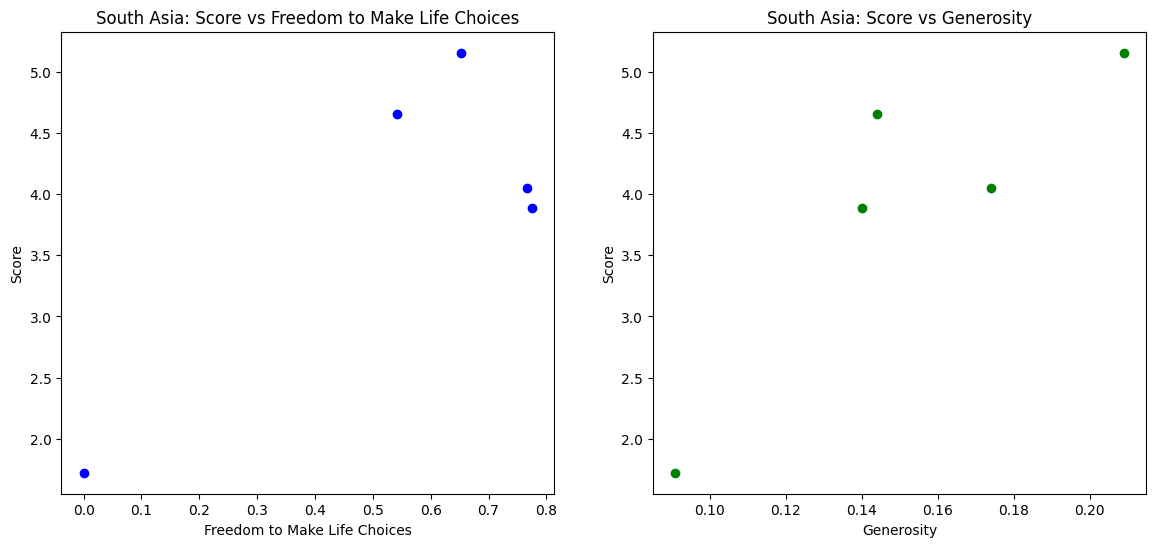

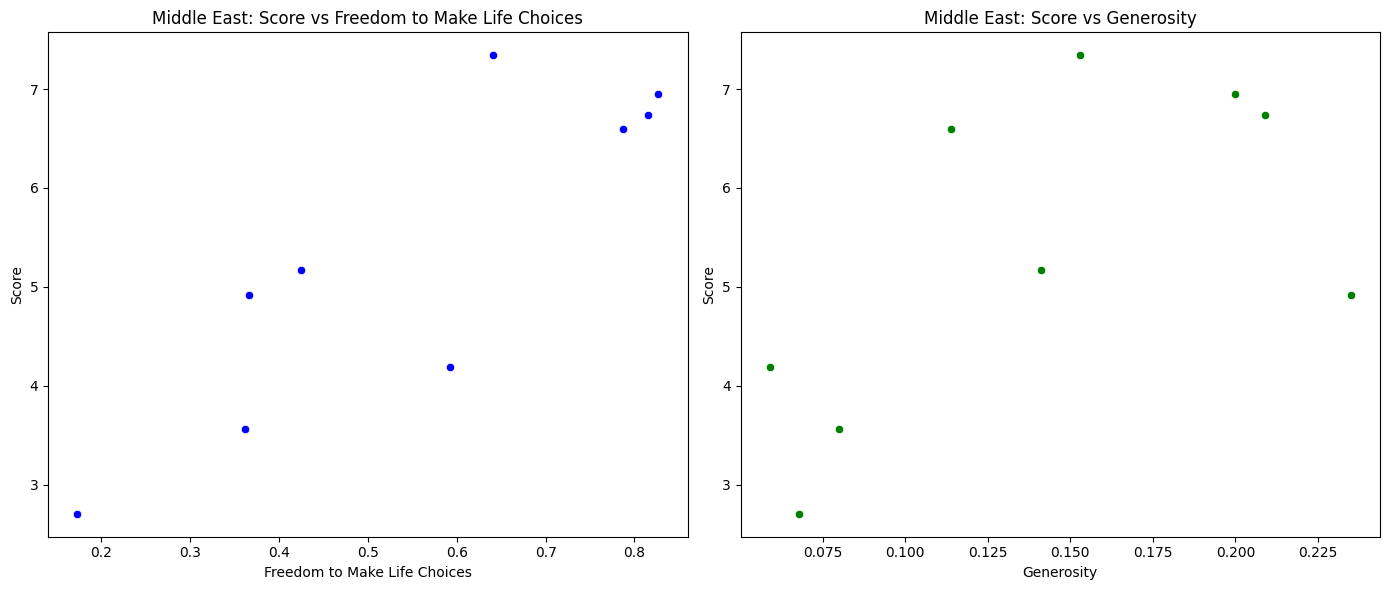

In [ ]:
# 1.2. Create scatter plots to visualize and interpret the relationships

# 3.Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize = (14, 6))

# Scatter plot for all countries
plt.subplot(1,2,1)
plt.scatter(x = southasian_data['Freedom to make life choices'], y = southasian_data['score'], color="blue", label="Countries")
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

plt.subplot(1,2,2)
plt.scatter(x = southasian_data['Generosity'], y = southasian_data['score'], color="green", label="Countries")
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.show()

plt.figure(figsize=(14, 6))
# Scatter plot for Middle East: Score vs Freedom to Make Life Choices
plt.subplot(1, 2, 1)
sns.scatterplot(x = middle_east_data['Freedom to make life choices'], y=middle_east_data['score'], color='blue')
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Score')

# Scatter plot for Middle East: Score vs Generosity
plt.subplot(1, 2, 2)
sns.scatterplot(x = middle_east_data['Generosity'], y = middle_east_data['score'], color='green')
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


Task 1.6 : Outlier Detection

In [ ]:
# 1.1. Identofy outliers based on Score and GDP per Capita (using the 1.5 × IQR rule)

outlier_score_southAsian = 1.5 * (4.657000 - 3.886000) #Q3 - Q1
outlier_score_middleEast = 1.5 * (6.698250 - 4.370250)

outlier_capita_southAsian = 1.5 * (1.122000 - 0.965000) #Q3 - Q1
outlier_capita_middleEast = 1.5 * (1.842000 - 1.262000)

print("South Asian Region")
print("Outlier in score: ",outlier_score_southAsian)
print("Outlier in GDP per capita: ",outlier_capita_southAsian)
print()
print("Middle East Region")
print("Outlier in score: ",outlier_score_middleEast)
print("Outlier in GDP per capita: ",outlier_capita_middleEast)

South Asian Region
Outlier in score:  1.1564999999999999
Outlier in GDP per capita:  0.2355000000000002

Middle East Region
Outlier in score:  3.491999999999999
Outlier in GDP per capita:  0.8700000000000001


Scatter plot : South Asia 


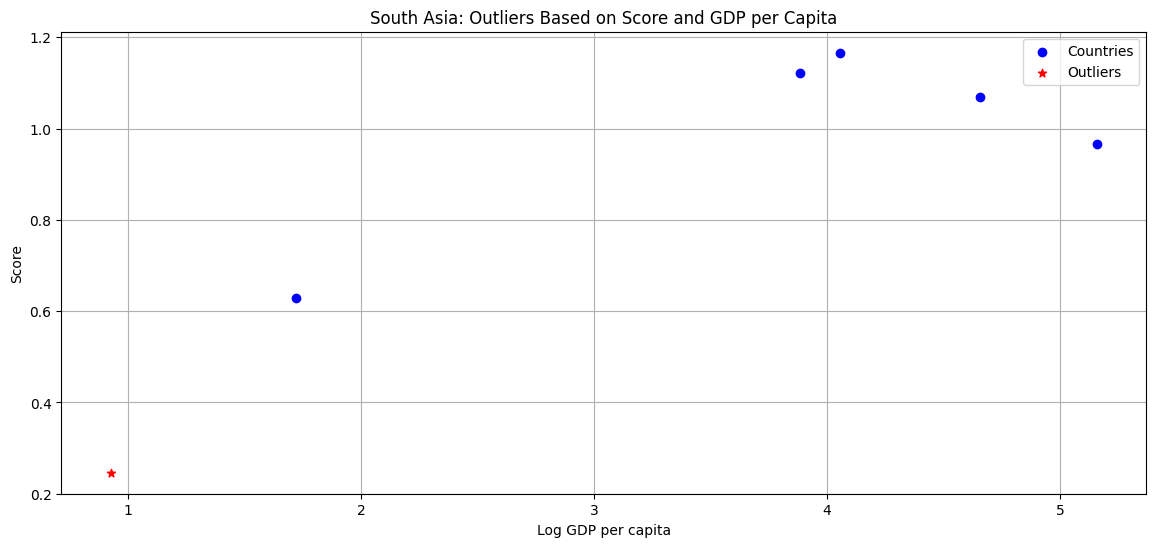

Scatter plot : Middle East


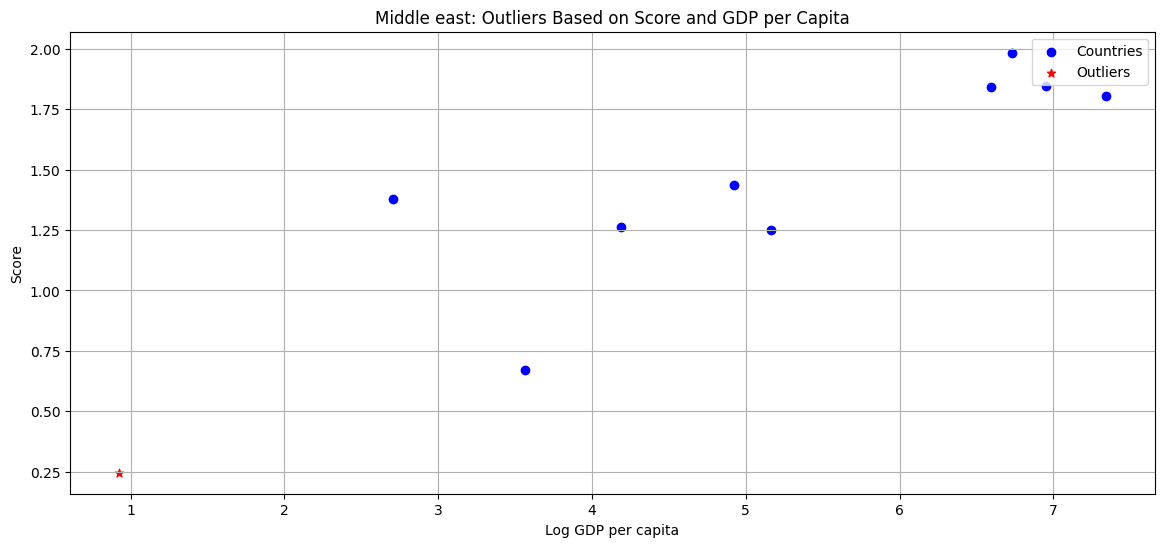

In [ ]:
# 1.2. Plot these outliers and discuss their implications

import matplotlib.pyplot as plt
import pandas as pd

# South Asian
plt.figure(figsize = (14, 6))
plt.scatter(southasian_data["score"], southasian_data["Log GDP per capita"], color="blue", label="Countries")

# Highlight outliers in red
plt.scatter(outlier_score, outlier_capita, color="red", marker="*", label="Outliers")
print("Scatter plot : South Asia ")

plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('South Asia: Outliers Based on Score and GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()


# Middle East
plt.figure(figsize = (14, 6))
plt.scatter(middle_east_data["score"], middle_east_data["Log GDP per capita"], color="blue", label="Countries")

# Highlight outliers in red
plt.scatter(outlier_score, outlier_capita, color="red", marker="*", label="Outliers")
print("Scatter plot : Middle East")

plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Middle east: Outliers Based on Score and GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()



Implications of the outliers:

Outliers -> Outliers refer to those countries that have uncommonly high or low values in comparison to other countries.

Implications ->

Outliers in scatter plot demonstates the relationship between GDP and Score. The relationship here is not always linear. The GDP does not always reflects high happiness scores. Outliers showcases the disconnection between the GDP and happiness score and how they arent interlinked with each other.

-> There may be cases of high GDP but low happiness score and on the other hand, low GDP but high happiness score.

-> The outliers provides insights on the economic and non-economic variations and improvements on these in order to have improved well-being.


Task 1.7 : Visualization

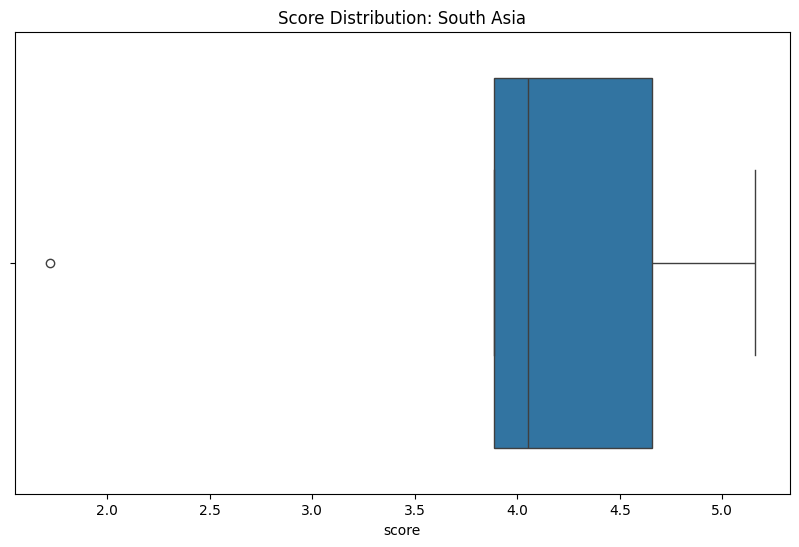

In [ ]:
# 1.1. Create boxplots comparing the distribution of Score between South Asia and the Middle East

plt.figure(figsize = (10, 6))
sns.boxplot(data = southasian_data, x = 'score')
plt.title('Score Distribution: South Asia')
plt.show()


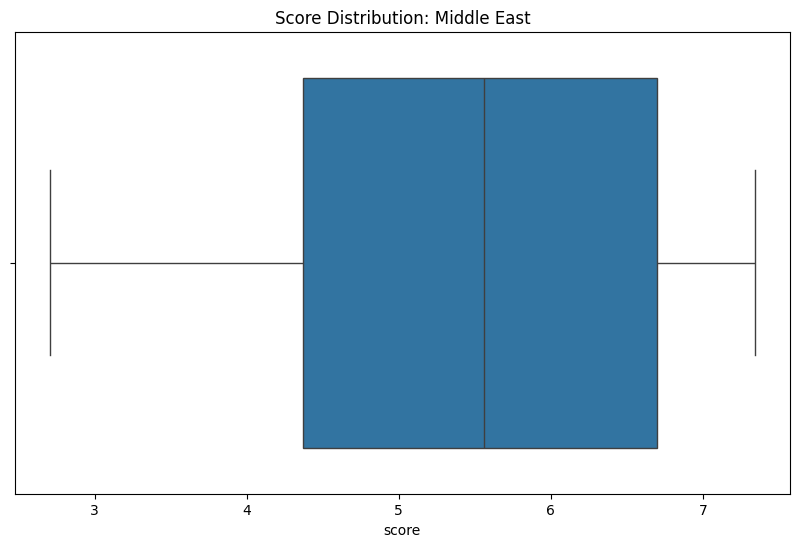

In [ ]:
# 1.1

plt.figure(figsize = (10, 6))
sns.boxplot(data = middle_east_data, x = 'score')
plt.title('Score Distribution: Middle East')
plt.show()

1.2 : Interpret the key differences in distribution shapes, medians and outliers.
